In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nba_api
import seaborn as sns

In [12]:
play_types = [
    "isolation",
    "cut",
    "off_screen",
    "PnR_handler",
    "PnR_roller",
    "post_up",
    "spot_up"
]

In [13]:
output = {}
for play in play_types:
    output[play] = pd.read_csv("Results/" + play + "_labels.csv")

In [14]:
height_weight_data = pd.read_csv("Data/PlayerMeasurements/height_weight.csv")
height_weight_data.drop(height_weight_data.columns.difference(['PLAYER','HEIGHT', "WEIGHT"]), axis=1, inplace=True)

In [15]:
#Join dataframes
for play in play_types:
    output[play] = output[play].merge(height_weight_data, how='left', on="PLAYER")

In [18]:
"""
Isolation clusters
"""

'\nIsolation clusters\n'

In [56]:
play="off_screen"
print(output[play][output[play]["LABEL"] == 2]["PLAYER"])

6           Nikola Jokic
10    Karl-Anthony Towns
12        Jordan Hawkins
14       Anthony Edwards
17        Shaedon Sharpe
18        Gordon Hayward
24          Jaylen Brown
26            Kyle Kuzma
27            Sam Hauser
28          LeBron James
32         Dillon Brooks
33          Franz Wagner
34     Jaren Jackson Jr.
35         Chet Holmgren
40           Jalen Green
42     Victor Wembanyama
43        Keyonte George
44     De'Anthony Melton
45       Cade Cunningham
49          Cole Anthony
50          Jimmy Butler
52         Norman Powell
53            Isaiah Joe
56           Luka Doncic
57        Scottie Barnes
58         Julius Randle
61              Naz Reid
62          Jayson Tatum
65       De'Andre Hunter
Name: PLAYER, dtype: object


77.29032258064517
206.51612903225808
78.0
211.1
79.27586206896552
219.93103448275863


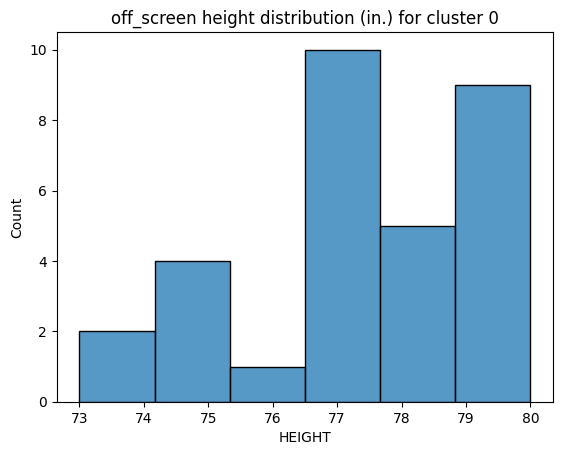

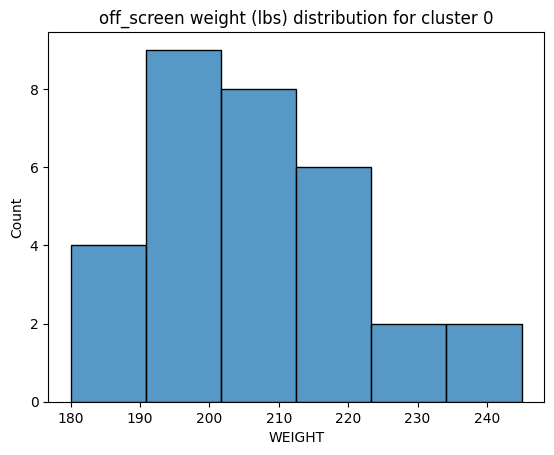

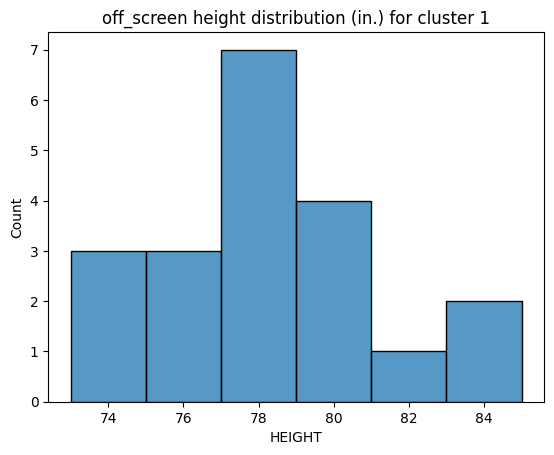

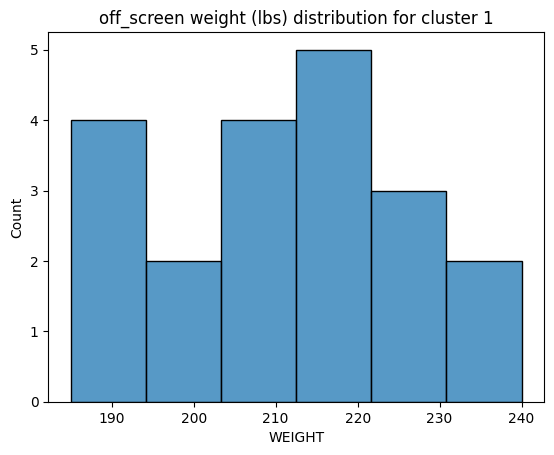

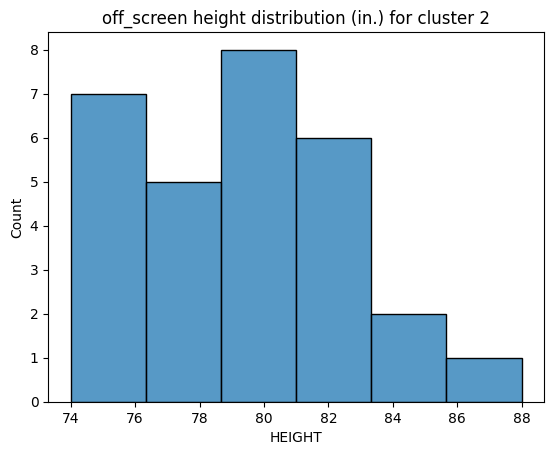

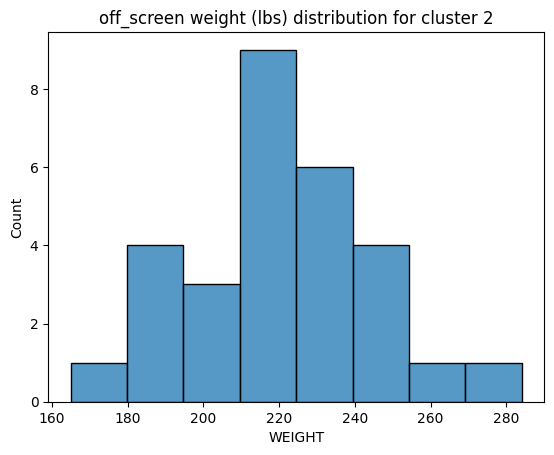

In [57]:
play="off_screen"
for cluster in range(len(pd.unique(output[play]["LABEL"]))):
    plt.figure()
    print(np.mean(output[play][output[play]["LABEL"] == cluster]["HEIGHT"]))
    sns.histplot(data=output[play][output[play]["LABEL"] == cluster], x="HEIGHT").set(title=(play + " height distribution (in.) for cluster " + str(cluster)))
    print(np.mean(output[play][output[play]["LABEL"] == cluster]["WEIGHT"]))
    plt.figure()
    sns.histplot(data=output[play][output[play]["LABEL"] == cluster], x="WEIGHT").set(title=(play + " weight (lbs) distribution for cluster " + str(cluster)))


81.61904761904762
240.57142857142858
83.0625
243.375
82.6923076923077
235.69230769230768


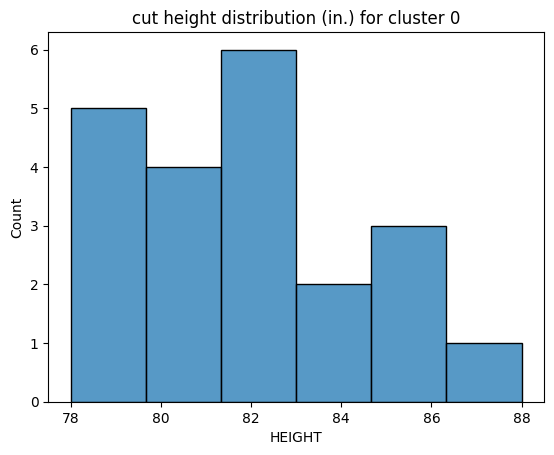

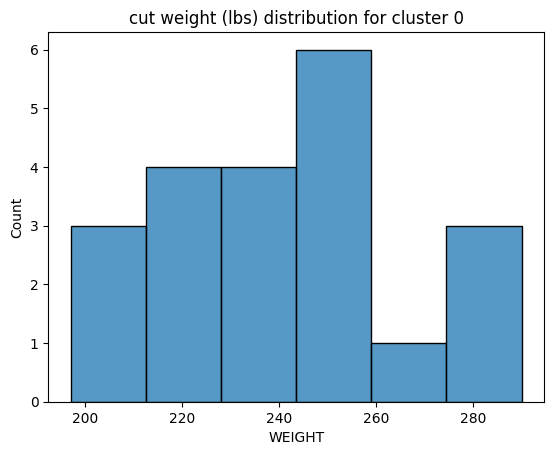

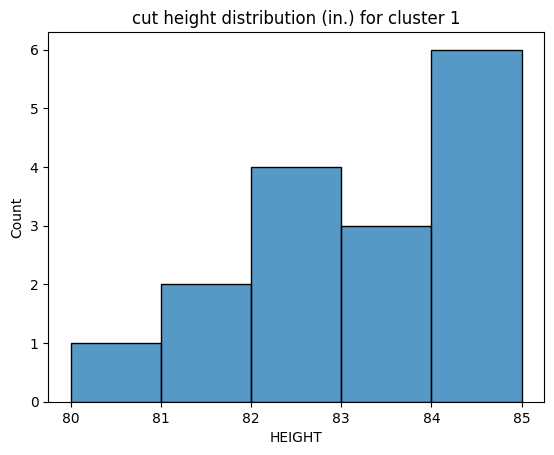

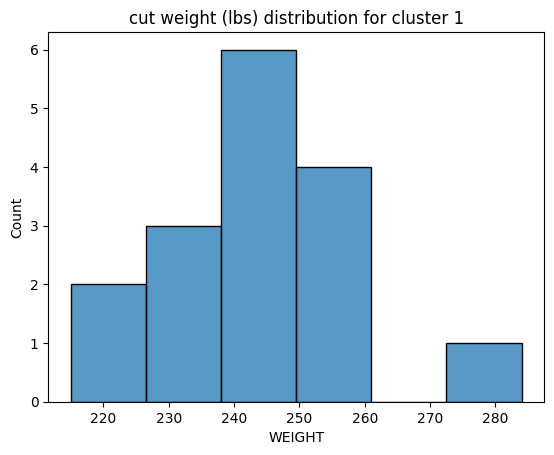

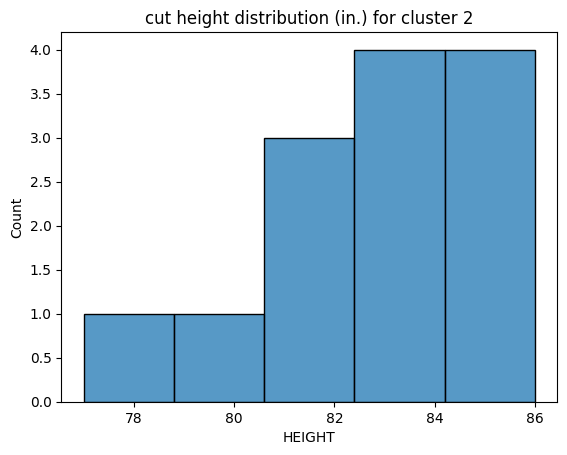

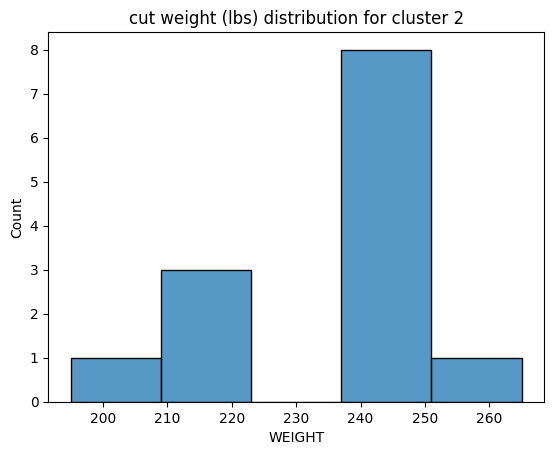

In [44]:
play="cut"
for cluster in range(len(pd.unique(output[play]["LABEL"]))):
    plt.figure()
    print(np.mean(output[play][output[play]["LABEL"] == cluster]["HEIGHT"]))
    sns.histplot(data=output[play][output[play]["LABEL"] == cluster], x="HEIGHT").set(title=(play + " height distribution (in.) for cluster " + str(cluster)))
    print(np.mean(output[play][output[play]["LABEL"] == cluster]["WEIGHT"]))
    plt.figure()
    sns.histplot(data=output[play][output[play]["LABEL"] == cluster], x="WEIGHT").set(title=(play + " weight (lbs) distribution for cluster " + str(cluster)))
